<a href="https://colab.research.google.com/github/jercash/build_a_star_overcashFINAL/blob/main/build_a_star_workshop_overcash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build-a-Star Workshop
*The most heat you'll ever make*

By Jeremy Overcash :)

jercash32@gmail.com

In this notebook we will build a star using the Equations of Stellar Structure. This should work for a star of any mass on the main sequence.

Since this is a very difficult task, we will be making some preemptive assumptions. We will assume that the star...

- ...can transport all heat radiatively (convective heat transport is an entirely new beast)

- ...will use purely P-P Chain reactions to generate energy. The CNO cycle will be left out

- ...has a similar material composition and ionization as our Sun

- ...has a similar opacity to the Sun, which will remain constant throughout the star

The first step is to import libraries. We will need numpy, scpipy, and matplot:

In [1]:
import numpy as np
import scipy.constants as scp
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Variables and Constants

Next, we will define our variables and constants. $M$ can be altered by the viewer to change the mass of the star. Notice how there is only ONE thing the user can change; the goal behind this project is to show how *dependent* on its mass a star really is!

In [2]:
#user-defined variables:
M = 1 * 1.989e30 #kg, mass of the star. coverted from solar masses to kg

#constants:
G = 6.67e-11 #m^3/kg*s^2, gravitational constant
pi = scp.pi #our value of pi. this makes it easier to keep track of
X_fraction = 0.740 #in %, mass fraction of Hydrogen in our Sun
mu = 0.6 #unitless
Msolar = 1.989e30 #kg, mass of our Sun
Rsolar = 690000000 #m, radius of our Sun
opacity = 8 #m^2/kg, similar to the Sun's opacity
Eo = 1.08e-12 #W*m^3/kg^2, constant used in energy generation function
sigma = scp.sigma #W/m^2K^4, Stefan-Boltzmann constant
mh = scp.m_p #kg, mass of proton
k = scp.k #boltzmann constant

# Equations and Functions

We will be using many equations to build our star. Here is a list of their names:

- Hydrostatic Equilibrium

- Equation of State

- Mass Continuity

- Radiative Temperature Gradient

- Solar Luminosity

- Energy Generation

There's a lot here, so I will define them in comments as we go. 

First up, we will define an equation to find the radius of the star from the user-defined mass:

In [3]:
if (M / Msolar) == 1.0: #we want the one we actually know to be true!
  R = Rsolar
else:
  if (M / Msolar) > 1.66: #the rules for radius change as stars get large!
    R = 1.33*Rsolar*(M/Msolar)**0.555
  else:
    R = 1.06*Rsolar*(M/Msolar)**0.945

R = int(R)

Now that we have our radius, we can write an equation to find density. Since density changes with radial distance, we must define:

In [4]:
density = 3*M / (4*pi*R**3)

That wasn't so bad! Now, let's get to the good stuff. We can find the mass internal to a radial distance using the Mass Continuity Equation. This is where we need to start integrating, since this equation traditionally gives us the *change* in mass:

In [5]:
def mass(r): #integral of mass continuity equation
  return 4*pi*r**3*density/3

print(mass(R))

1.989e+30


Now that we have our mass continuity equation ready, we can set up our equation for Hydrostatic Equilibrium. This is *also* a "change-in" equation, so we need to find the integral as well.

In [6]:
def pressure(r): #integral of hydrostatic equilibrium
  return G*mass(r)/r

print(pressure(R))

192270000000.0


The next equations we need are our Luminosity equations. Before we can define the change in luminosity, we need to define the equation for core temperature of a star, which writes:

In [7]:
def Tcore(r):
  return mu*mh*pressure(r)/(density*k)

print(Tcore(R))

9668.929137488933


Next, the equation for energy generation. The equation we are using here is for P-P chain energy generation, rather than CNO cycle energy generation:

In [8]:
def Epp(r): 
  return Eo*density*X_fraction**2*(Tcore(r)**4)/1e11
  
print(Epp(R))

7.471359019250179e-05


Now we can define our Luminosity as:

In [9]:
def luminosity(r): #integral of the luminosity equation
  return 3*pi*r**3*density*Epp(r)

print(luminosity(R))

3.3436199450899356e+26


Finally, our radiative temperature gradient equation can be defined. This is written as:

In [10]:
def Trad(r):
  return opacity*density*luminosity(r)/(64*pi*sigma*r*Tcore(r)**3)

print(Trad(R))

543725861062408.06


# Put it all Together

Now that we have all of our functions, we can start making plots for all of our gradients. First, we will make a plot for mass concentration:

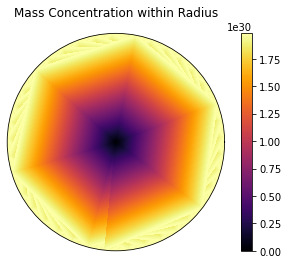

In [24]:
fig = plt.figure()

x = np.linspace(0,R,1000)
j = mass(x)
mass_con = np.linspace(mass(0),mass(R),360)
rad = np.linspace(0, 2*pi, 360)
y = np.linspace(0,R,1000)
theta,r = np.meshgrid(rad,y)
z = np.tile(mass_con,(len(y),1))

plt.subplot(projection="polar")
plt.pcolormesh(r,theta,z,cmap='inferno')
plt.grid()
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.title("Mass Concentration within Radius")
plt.show()

Beautiful! Now, do the same for hydrostatic equilibrium, giving us our pressure gradient:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


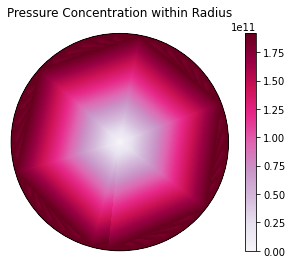

In [31]:
fig = plt.figure()

x = np.linspace(0,R,1000)
j = pressure(x)
press_con = np.linspace(pressure(1),pressure(R),360)
rad = np.linspace(0, 2*pi, 360)
y = np.linspace(0,R,1000)
theta,r = np.meshgrid(rad,y)
z = np.tile(press_con,(len(y),1))

plt.subplot(projection="polar")
plt.pcolormesh(r,theta,z,cmap='PuRd')
plt.grid()
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.title("Pressure Concentration within Radius")
plt.show()

Great! Now, for Luminosity:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


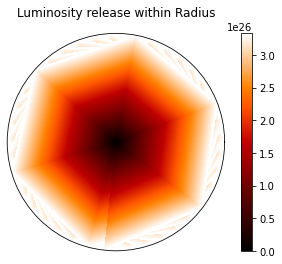

In [32]:
fig = plt.figure()

x = np.linspace(0,R,1000)
j = luminosity(x)
lumin_con = np.linspace(luminosity(1),luminosity(R),360)
rad = np.linspace(0, 2*pi, 360)
y = np.linspace(0,R,1000)
theta,r = np.meshgrid(rad,y)
z = np.tile(lumin_con,(len(y),1))

plt.subplot(projection="polar")
plt.pcolormesh(r,theta,z,cmap='gist_heat')
plt.grid()
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.title("Luminosity release within Radius")
plt.show()

Now, finally, we can plot Radiative Heat Transport:

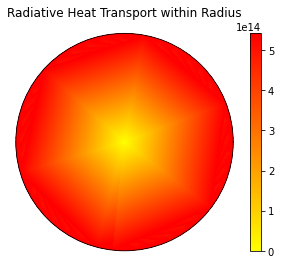

In [34]:
fig = plt.figure()

#x = np.linspace(0,R,1000)
#j = mass(x)
trad_con = np.linspace(Trad(1),Trad(R),360)
rad = np.linspace(0, 2*pi, 360)
y = np.linspace(0,R,1000)
theta,r = np.meshgrid(rad,y)
z = np.tile(trad_con,(len(y),1))

plt.subplot(projection="polar")
plt.pcolormesh(r,theta,z,cmap='autumn_r')
plt.grid()
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.title("Radiative Heat Transport within Radius")
plt.show()

This final plot shows us how stars will switch between Radiative and Convective heat transport, seemingly at will. If the star's Radiative transport is less efficient, it will switch to Convective transport and will be able to move heat from the center outwards easier.

***Thank you for reading through my work!***